In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import umap

In [13]:
# loading the dataset
df = pd.read_csv('./zoo.csv')

In [15]:
# summary of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  class_type   101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [16]:
# Counts unique values per column
print(df.nunique())

animal_name    100
hair             2
feathers         2
eggs             2
milk             2
airborne         2
aquatic          2
predator         2
toothed          2
backbone         2
breathes         2
venomous         2
fins             2
legs             6
tail             2
domestic         2
catsize          2
class_type       7
dtype: int64


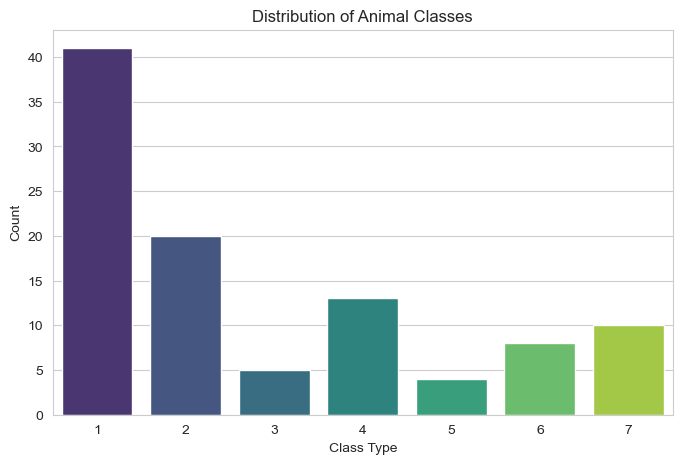

In [17]:

# distribution of 'class_type'
plt.figure(figsize=(8, 5))
sns.countplot(x='class_type', data=df, palette='viridis')
plt.title('Distribution of Animal Classes')
plt.xlabel('Class Type')
plt.ylabel('Count')
plt.show()


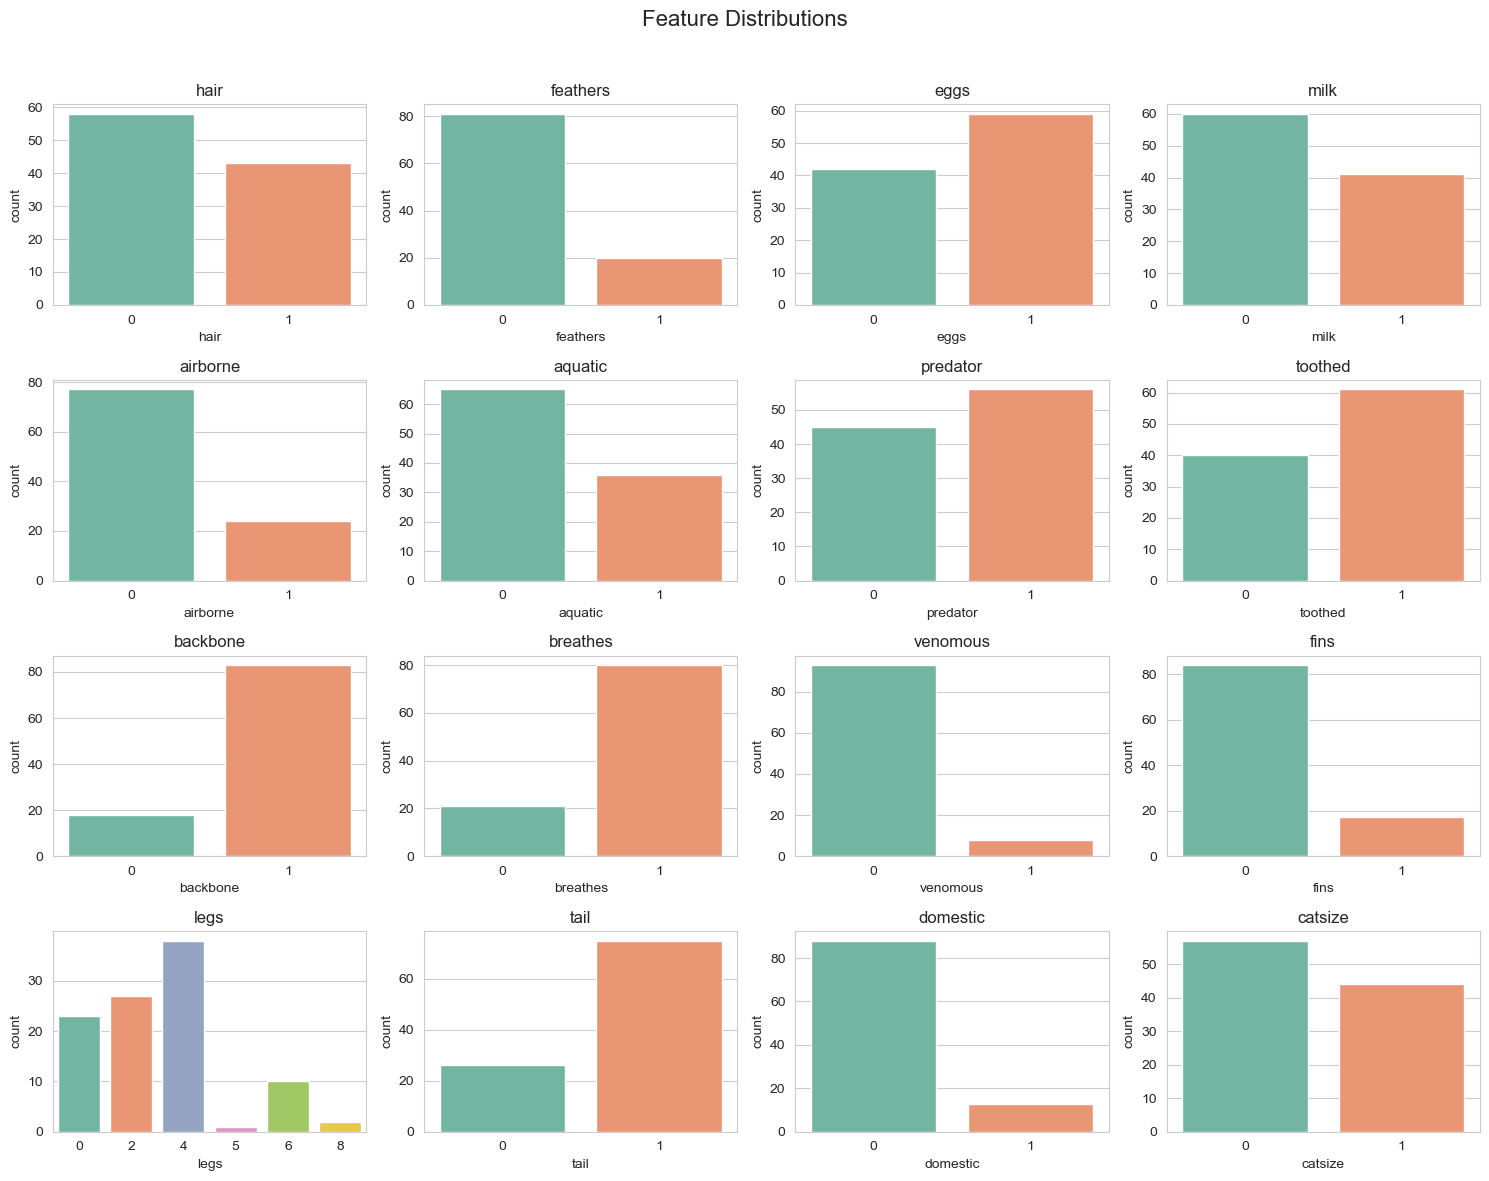

In [18]:
# distribution of features
features = df.drop(columns=['class_type', 'animal_name'])  

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 12))
fig.suptitle('Feature Distributions', fontsize=16)

for idx, col in enumerate(features):
    ax = axes[idx // 4, idx % 4]
    sns.countplot(x=col, data=df, palette='Set2', ax=ax)
    ax.set_title(col)


plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


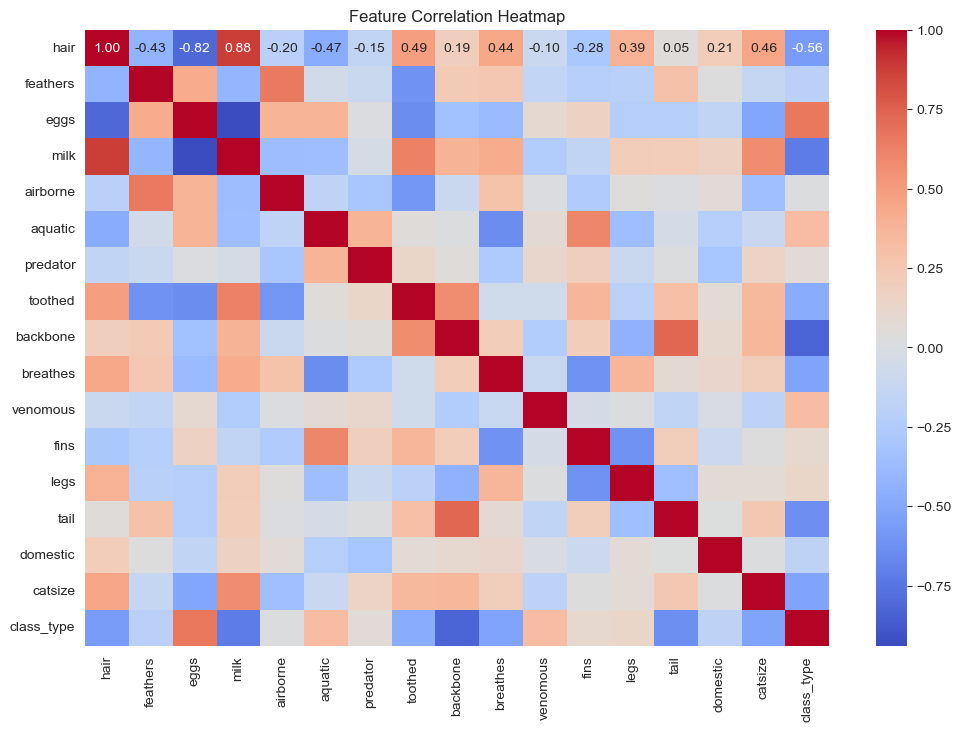

In [19]:
# correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.drop(columns=['animal_name']).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()

In [ ]:
# kmean clustering on the original data and validation
X = df.drop(columns=['class_type', 'animal_name'])  
y_true = df['class_type'] 

kmeans = KMeans(n_clusters=7, random_state=42)
kmeans.fit(X)

from scipy.stats import mode
labels = np.zeros_like(kmeans.labels_)
for i in range(7):
    mask = (kmeans.labels_ == i)
    labels[mask] = mode(y_true[mask])[0]

conf_matrix = confusion_matrix(y_true, labels)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_report(y_true, labels))

In [20]:
# kmean clustering on the PCA coordinates and validation
X = df.drop(columns=['class_type', 'animal_name'])  
y_true = df['class_type']  

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

kmeans = KMeans(n_clusters=7, random_state=42)
kmeans.fit(X_pca)
labels = kmeans.labels_

from scipy.stats import mode
cluster_labels = np.zeros_like(labels)
for i in range(7):
    mask = (labels == i)
    cluster_labels[mask] = mode(y_true[mask])[0]

conf_matrix = confusion_matrix(y_true, cluster_labels)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_report(y_true, cluster_labels))


c:\Users\Goli\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Goli\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Confusion Matrix:
 [[40  0  1  0  0  0  0]
 [ 0 20  0  0  0  0  0]
 [ 0  0  4  1  0  0  0]
 [ 0  0  0 13  0  0  0]
 [ 0  0  3  0  0  0  1]
 [ 0  0  0  0  0  8  0]
 [ 0  0  0  0  0  3  7]]
Classification Report:
               precision    recall  f1-score   support

           1       1.00      0.98      0.99        41
           2       1.00      1.00      1.00        20
           3       0.50      0.80      0.62         5
           4       0.93      1.00      0.96        13
           5       0.00      0.00      0.00         4
           6       0.73      1.00      0.84         8
           7       0.88      0.70      0.78        10

    accuracy                           0.91       101
   macro avg       0.72      0.78      0.74       101
weighted avg       0.89      0.91      0.90       101



c:\Users\Goli\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Goli\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Goli\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
# 3D visualization of clusters on PCA coordinates
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3'])
pca_df['Cluster'] = labels
pca_df['Class'] = y_true

fig = px.scatter_3d(pca_df, x='PC1', y='PC2', z='PC3', color=pca_df['Cluster'].astype(str),
                    symbol=pca_df['Class'].astype(str),
                    title='3D PCA Clustering of Animals',
                    labels={'Cluster': 'Cluster', 'Class': 'True Class'},
                    opacity=0.8)

fig.update_traces(marker=dict(size=8))
fig.show()


In [28]:
# kmean clustering on the UMAP coordinates and validation
X = df.drop(columns=['class_type', 'animal_name']) 
y_true = df['class_type']  

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

umap_3d = umap.UMAP(n_components=3, random_state=42)
X_umap = umap_3d.fit_transform(X_scaled)

kmeans = KMeans(n_clusters=7, random_state=42)
kmeans.fit(X_umap)
labels = kmeans.labels_

from scipy.stats import mode
cluster_labels = np.zeros_like(labels)
for n in range(7):
    mask = (labels == n)
    cluster_labels[mask] = mode(y_true[mask])[0]
conf_matrix = confusion_matrix(y_true, cluster_labels)

print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_report(y_true, cluster_labels))




c:\Users\Goli\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Goli\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



Confusion Matrix:
 [[41  0  0  0  0  0  0]
 [ 0 20  0  0  0  0  0]
 [ 0  1  4  0  0  0  0]
 [ 0  0  0 13  0  0  0]
 [ 0  0  4  0  0  0  0]
 [ 0  0  0  0  0  0  8]
 [ 0  0  0  0  0  0 10]]
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        41
           2       0.95      1.00      0.98        20
           3       0.50      0.80      0.62         5
           4       1.00      1.00      1.00        13
           5       0.00      0.00      0.00         4
           6       0.00      0.00      0.00         8
           7       0.56      1.00      0.71        10

    accuracy                           0.87       101
   macro avg       0.57      0.69      0.62       101
weighted avg       0.80      0.87      0.83       101



c:\Users\Goli\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\Goli\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\Goli\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [24]:
# 3D visualization of clusters on UMAP coordinates
umap_df = pd.DataFrame(X_umap, columns=['UMAP1', 'UMAP2', 'UMAP3'])
umap_df['Cluster'] = labels
umap_df['Class'] = y_true

fig = px.scatter_3d(umap_df, x='UMAP1', y='UMAP2', z='UMAP3', color=umap_df['Cluster'].astype(str),
                    symbol=umap_df['Class'].astype(str),
                    title='3D UMAP Clustering of Zoo Dataset',
                    labels={'Cluster': 'Cluster', 'Class': 'True Class'},
                    opacity=0.8)

fig.update_traces(marker=dict(size=5))
fig.show()
